In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
n_rows = dataset.shape[0]
n_test = int(0.1 * n_rows // 1)
train_dataset = dataset[0 : n_rows - n_test]
test_dataset = dataset[n_rows - n_test : n_rows]
cols = train_dataset.columns

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               692 non-null    int64  
 1   Glucose                   692 non-null    int64  
 2   BloodPressure             692 non-null    int64  
 3   SkinThickness             692 non-null    int64  
 4   Insulin                   692 non-null    int64  
 5   BMI                       692 non-null    float64
 6   DiabetesPedigreeFunction  692 non-null    float64
 7   Age                       692 non-null    int64  
 8   Outcome                   692 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.8 KB


In [6]:
train_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136962,0.145099,-0.098287,-0.071208,0.030829,-0.043614,0.549801,0.224246
Glucose,0.136962,1.000000,0.144366,0.056675,0.331740,0.224909,0.139951,0.272216,0.457032
BloodPressure,0.145099,0.144366,1.000000,0.200327,0.095158,0.271357,0.031630,0.238547,0.055565
SkinThickness,-0.098287,0.056675,0.200327,1.000000,0.444555,0.385911,0.179377,-0.122478,0.080803
Insulin,-0.071208,0.331740,0.095158,0.444555,1.000000,0.202638,0.200522,-0.024169,0.138440
BMI,0.030829,0.224909,0.271357,0.385911,0.202638,1.000000,0.131929,0.036875,0.309951
DiabetesPedigreeFunction,-0.043614,0.139951,0.031630,0.179377,0.200522,0.131929,1.000000,0.036221,0.177182
Age,0.549801,0.272216,0.238547,-0.122478,-0.024169,0.036875,0.036221,1.000000,0.222361
Outcome,0.224246,0.457032,0.055565,0.080803,0.138440,0.309951,0.177182,0.222361,1.000000


<AxesSubplot: >

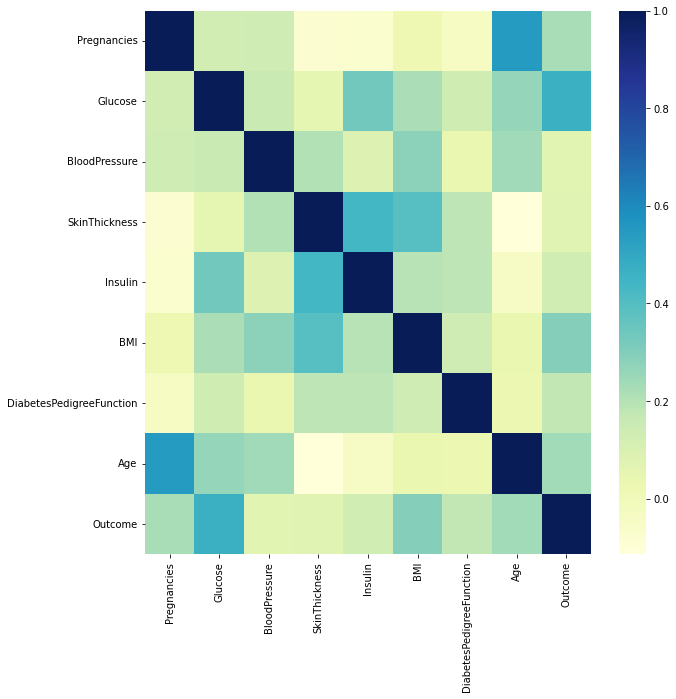

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), cmap="YlGnBu")

In [8]:
train_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
687,1,107,50,19,0,28.3,0.181,29,0
688,1,140,74,26,180,24.1,0.828,23,0
689,1,144,82,46,180,46.1,0.335,46,1
690,8,107,80,0,0,24.6,0.856,34,0


In [9]:
train_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.00000,692.000000
mean,3.829480,120.497110,68.924855,20.423410,79.387283,31.876445,0.476223,33.15896,0.343931
std,3.374776,32.297975,19.443789,16.021013,115.072759,7.960887,0.337888,11.81775,0.475362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.00000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.000000,0.240000,24.00000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.000000,32.000000,0.375500,29.00000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,126.500000,36.500000,0.637000,40.00000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.00000,1.000000


In [10]:
X = train_dataset.iloc[:, 0 : 8]
y = train_dataset.iloc[:, 8]

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
687,1,107,50,19,0,28.3,0.181,29
688,1,140,74,26,180,24.1,0.828,23
689,1,144,82,46,180,46.1,0.335,46
690,8,107,80,0,0,24.6,0.856,34


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
687    0
688    0
689    1
690    0
691    1
Name: Outcome, Length: 692, dtype: int64

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, shuffle = False)

# Decision Tree

In [14]:
X_train_dt = X_train.copy()
X_valid_dt = X_valid.copy()
test_dataset_dt = test_dataset.copy()
cut_off = [3.829480, 120.497110, 68.924855, 20.423410, 79.387283, 31.876445, 0.476223, 33.15896]

In [15]:
for i in range(0, len(cols) - 1):
    X_train_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in X_train_dt[cols[i]]]
    X_valid_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in X_valid_dt[cols[i]]]
    test_dataset_dt[cols[i]] = [(1, 0) [x > cut_off[i]] for x in test_dataset_dt[cols[i]]]

In [16]:
X_train_dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,0,0,0,1,0,0,0
1,1,1,1,0,1,1,1,1
2,0,0,1,1,1,1,0,1
3,1,1,1,0,0,1,1,1
4,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
548,1,0,0,0,1,0,1,0
549,0,0,0,0,1,1,0,0
550,1,1,0,0,1,1,1,1
551,1,1,1,0,0,0,0,1


In [17]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if y_train[i] == 0:
        total_zero += 1
    else:
        total_one += 1
    total += 1
entropy_level0_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [18]:
entropy_level0 = []
for i in range(0, len(cols) - 1):
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
            one += 1
        elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
            two += 1
        elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
            three += 1
        elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
            four += 1

    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level0.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [19]:
entropy_level0

[0.906440589538041,
 0.8291726436939375,
 0.9246649681616204,
 0.9294569062838418,
 0.9198005746857978,
 0.8908514678347113,
 0.9182233571111105,
 0.9077076198104991]

In [20]:
info_gain_level0 = []
for i in entropy_level0:
    info_gain_level0.append(entropy_level0_whole - i)

In [21]:
info_gain_level0

[0.029947414436669928,
 0.10721536028077339,
 0.011723035813090532,
 0.006931097690869081,
 0.016587429288913103,
 0.04553653613999964,
 0.01816464686360042,
 0.028680384164211814]

In [22]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train_dt)):
    if X_train_dt['Glucose'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1
entropy_level1_no_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [23]:
entropy_level1_no_whole

0.9915017866855546

In [24]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1
entropy_level1_yes_whole = (-1) * ((total_zero / total) * math.log2(total_zero / total) + (total_one / total) * math.log2(total_one / total))

In [25]:
entropy_level1_yes_whole

0.6962122601251458

In [26]:
entropy_level1_no = []
for i in range(0, len(cols) - 1):
    if cols[i] == 'Glucose':
        continue
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt['Glucose'][j] == 0:
            if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
                one += 1
            elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
                two += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
                three += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
                four += 1
    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level1_no.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [27]:
entropy_level1_no

[0.9852670929612005,
 0.9914594332094533,
 0.9886531953907245,
 0.9915011025723098,
 0.9531964690337007,
 0.9716018804080975,
 0.9878735395227329]

In [28]:
entropy_level1_yes = []
for i in range(0, len(cols) - 1):
    if cols[i] == 'Glucose':
        continue
    one = 0
    two = 0
    three = 0
    four = 0
    for j in range(0, len(X_train_dt[cols[i]])):
        if X_train_dt['Glucose'][j] == 1:
            if X_train_dt[cols[i]][j] == 0 and y_train[j] == 0:
                one += 1
            elif X_train_dt[cols[i]][j] == 0 and y_train[j] == 1:
                two += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 0:
                three += 1
            elif X_train_dt[cols[i]][j] == 1 and y_train[j] == 1:
                four += 1
    p1 = one + two
    p2 = three + four
    t1 = p1 / (p1 + p2)
    t2 = p2 / (p1 + p2)
    entropy_level1_yes.append((-1) * (t1 * ((one / p1) * math.log2(one / p1) + (two / p1) * math.log2(two / p1)) + t2 * ((three / p2) * math.log2(three / p2) + (four / p2) * math.log2(four / p2))))

In [29]:
entropy_level1_yes

[0.6567964359859386,
 0.685924229035644,
 0.6859859615755051,
 0.6870498304376795,
 0.6708389104287369,
 0.682462751456447,
 0.6684066685899233]

In [30]:
info_gain_level1_no = []
for i in entropy_level1_no:
    info_gain_level1_no.append(entropy_level1_no_whole - i)

In [31]:
info_gain_level1_no

[0.006234693724354035,
 4.23534761012645e-05,
 0.0028485912948300607,
 6.841132447199527e-07,
 0.038305317651853854,
 0.01989990627745708,
 0.0036282471628216184]

In [32]:
info_gain_level1_yes = []
for i in entropy_level1_yes:
    info_gain_level1_yes.append(entropy_level1_yes_whole - i)

In [33]:
info_gain_level1_yes

[0.03941582413920719,
 0.010288031089501826,
 0.010226298549640744,
 0.009162429687466278,
 0.02537334969640892,
 0.01374950866869884,
 0.02780559153522255]

In [34]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 0 and X_train_dt['BMI'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [35]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.6486486486486487 Probability of No: 0.35135135135135137


In [36]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 0 and X_train_dt['BMI'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [37]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.4158415841584158 Probability of No: 0.5841584158415841


In [38]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1 and X_train_dt['Pregnancies'][i] == 0:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [39]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.3025210084033613 Probability of No: 0.6974789915966386


In [40]:
total_zero = 0
total_one = 0
total = 0
for i in range(0, len(X_train)):
    if X_train_dt['Glucose'][i] == 1 and X_train_dt['Pregnancies'][i] == 1:
        if y_train[i] == 0:
            total_zero += 1
        else:
            total_one += 1
        total += 1

In [41]:
print('Probability of Yes:', total_one / total, 'Probability of No:', total_zero / total)

Probability of Yes: 0.11351351351351352 Probability of No: 0.8864864864864865


In [42]:
'''
Tree is:
                                Glucose
         Less than Mean                          More than Mean
               BMI                                 Pregnancies
Less than Mean     More than Mean      Less than Mean     More than Mean
      Yes               No                  No                 No
'''

'\nTree is:\n                                Glucose\n         Less than Mean                          More than Mean\n               BMI                                 Pregnancies\nLess than Mean     More than Mean      Less than Mean     More than Mean\n      Yes               No                  No                 No\n'

In [43]:
y_pred = []
for i in range(0, len(X_valid_dt)):
    if X_valid_dt['Glucose'][len(X_train_dt) + i] == 0 and X_valid_dt['BMI'][len(X_train_dt) + i] == 0:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
y_valid

553    0
554    0
555    0
556    0
557    0
      ..
687    0
688    0
689    1
690    0
691    1
Name: Outcome, Length: 139, dtype: int64

In [45]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train_dt) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train_dt) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train_dt) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for validation:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for validation: 0.7841726618705036


In [46]:
y_pred = []
for i in range(0, len(test_dataset_dt)):
    if test_dataset_dt['Glucose'][len(X) + i] == 0 and test_dataset_dt['BMI'][len(X) + i] == 0:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [47]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset_dt['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset_dt['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset_dt['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for test:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for test: 0.6842105263157895


# Logistic Regression

In [48]:
def dot_product(X, y, cols):
    prod = []
    for i in range(0, len(X)):
        p = 0
        for j in range(0, len(cols) - 1):
            p += X[cols[j]][i] * y[i]
        prod.append(p)
    return prod

In [49]:
def get_difference(y1, y2):
    diff = []
    for i in range(0, len(y1)):
        diff.append(y1[i] - y2[i])
    return diff

In [50]:
def new_weights(weights, d_weights):
    for i in range(0, len(weights)):
        weights[i] += weights[i] * d_weights[i]
    return weights

In [51]:
weights = []
bias = 1
for i in range(0, len(cols) - 1):
    weights.append(0.5)

num_iterations = 10
for k in range(0, num_iterations):
    y_pred = []
    for i in range(0, len(X_train)):
        pred = 0
        for j in range(0, len(cols) - 1):
            pred += X_train[cols[j]][i] * weights[j]
        pred += bias
        y_pred.append(1 / (1 + np.exp(-pred)))
    d_weights = dot_product(X_train, get_difference(y_pred, y_train), cols)
    d_bias = (1 / len(X_train)) * sum(get_difference(y_pred, y_train))
    weights = new_weights(weights, d_weights)
    bias += bias * d_bias

print(weights, bias)

[0.5, 3.163702563102503e+23, 0.5, 6.231372783538486e+24, 0.5, 5.123237741929248e+23, 0.5, 3.136280526245563e+22] 147.2083539962377


In [52]:
y_pred = []
for i in range(0, len(X_valid)):
    pred = 0
    for j in range(0, len(cols) - 1):
        pred += X_valid[cols[j]][len(X_train) + i] * weights[j]
    pred += bias
    y_pred.append(1 / (1 + np.exp(-pred)))

In [53]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for validation:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for validation: 0.30935251798561153


In [54]:
y_pred = []
for i in range(0, len(test_dataset)):
    pred = 0
    for j in range(0, len(cols) - 1):
        pred += test_dataset[cols[j]][len(X) + i] * weights[j]
    pred += bias
    y_pred.append(1 / (1 + np.exp(-pred)))

In [55]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for test:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for test: 0.39473684210526316


# KNN

In [56]:
def get_prediction(distances, i, k):
    nearest = []
    for l in range(0, k):
        mn = 1e10
        ans = -1
        for j in distances[i]:
            if distances[i][j] < mn and j not in nearest:
                mn = distances[i][j]
                ans = j
        nearest.append(ans)
    for i in range(0, len(nearest)):
        nearest[i] = y_train[nearest[i]]
    return nearest

In [57]:
distances = {}
for i in range(0, len(X_valid)):
    distances[i] = {}
    for j in range(0, len(X_train)):
        dist = 0
        for k in range(0, len(cols) - 1):
            dist += abs(X_train[cols[k]][j] - X_valid[cols[k]][len(X_train) + i])
        distances[i][j] = dist

In [58]:
y_pred = []
for i in range(0, len(X_valid)):
    y_pred.append(get_prediction(distances, i, 35))

In [59]:
ks = [5, 15, 25, 35]
for k in ks:
    pred = []
    for i in range(0, len(X_valid)):
        for j in range(0, k):
            one = 0
            zero = 0
            if y_pred[i][j] == 0:
                zero += 1
            else:
                one += 1
        if one > zero:
            pred.append(1)
        else:
            pred.append(0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(pred)):
        if pred[i] == 1 and y_valid[len(X_train) + i] == 1:
            tp += 1
        elif pred[i] == 1 and y_valid[len(X_train) + i] == 0:
            fp += 1
        elif pred[i] == 0 and y_valid[len(X_train) + i] == 0:
            tn += 1
        else:
            fn += 1

    print('Accuracy for validation for k =', k, ' :', (tp + tn) / (tp + tn + fp + fn))

Accuracy for validation for k = 5  : 0.7122302158273381
Accuracy for validation for k = 15  : 0.6618705035971223
Accuracy for validation for k = 25  : 0.6546762589928058
Accuracy for validation for k = 35  : 0.6618705035971223


In [60]:
distances = {}
for i in range(0, len(test_dataset)):
    distances[i] = {}
    for j in range(0, len(X_train)):
        dist = 0
        for k in range(0, len(cols) - 1):
            dist += abs(X_train[cols[k]][j] - test_dataset[cols[k]][len(X) + i])
        distances[i][j] = dist

In [61]:
y_pred = []
for i in range(0, len(test_dataset)):
    y_pred.append(get_prediction(distances, i, 35))

In [62]:
ks = [5, 15, 25, 35]
for k in ks:
    pred = []
    for i in range(0, len(test_dataset)):
        for j in range(0, k):
            one = 0
            zero = 0
            if y_pred[i][j] == 0:
                zero += 1
            else:
                one += 1
        if one > zero:
            pred.append(1)
        else:
            pred.append(0)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(0, len(pred)):
        if pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
            tp += 1
        elif pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
            fp += 1
        elif pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
            tn += 1
        else:
            fn += 1

    print('Accuracy for test for k =', k, ' :', (tp + tn) / (tp + tn + fp + fn))

Accuracy for test for k = 5  : 0.6052631578947368
Accuracy for test for k = 15  : 0.6447368421052632
Accuracy for test for k = 25  : 0.5657894736842105
Accuracy for test for k = 35  : 0.5657894736842105


# Backpropogation

In [63]:
def transform_into_binary(val):
    if val < 0.5:
        return 0
    return 1

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_bp = scaler.transform(X_train)
X_valid_bp = scaler.transform(X_valid)
test_dataset_bp = test_dataset.copy()
test_dataset_bp_x = test_dataset_bp.iloc[:, :-1]
test_dataset_bp_x = scaler.transform(test_dataset_bp_x)

In [65]:
scaler.mean_

array([  3.82459313, 120.46112116,  68.82278481,  20.52622061,
        79.84990958,  31.85551537,   0.48510488,  33.2477396 ])

In [66]:
X_train_bp

array([[ 0.65063747,  0.84158561,  0.16251638, ...,  0.21496007,
         0.41839147,  1.4174084 ],
       [-0.8448011 , -1.08368861, -0.14438706, ..., -0.64759869,
        -0.39542121, -0.1901812 ],
       [ 1.2488129 ,  1.91118241, -0.24668821, ..., -1.05423354,
         0.55107833, -0.10557122],
       ...,
       [-0.8448011 , -0.13633145,  0.06021523, ..., -0.54902055,
        -0.82886493, -1.03628099],
       [-0.24662567, -1.11424852, -0.04208592, ...,  0.00548152,
         0.31224199, -0.69784107],
       [ 0.65063747, -0.19745127,  0.98092557, ..., -0.49973148,
        -0.70207527,  2.77116806]])

In [67]:
X_valid_bp

array([[-0.8448011 , -0.99200889, -0.34898936, ..., -0.24096385,
        -0.18607085, -0.86706103],
       [-0.8448011 , -1.11424852, -0.24668821, ...,  0.62159492,
        -0.04158961, -0.44401114],
       [ 0.94972518,  0.10814781,  0.06021523, ..., -0.78314364,
        -0.95565458,  0.31747867],
       ...,
       [-0.8448011 ,  0.71934598,  0.67402213, ...,  1.75524358,
        -0.44259876,  1.07896848],
       [ 1.2488129 , -0.41137063,  0.57172098, ..., -0.89404405,
         1.09362012,  0.06364874],
       [ 2.74425147,  1.1471847 ,  2.31084051, ...,  1.2869974 ,
        -0.6725893 ,  0.90974853]])

In [68]:
test_dataset_bp_x

array([[-0.54571339,  0.01646809,  0.06021523,  0.7326683 ,  0.12992118,
         0.89268482,  1.18207802, -0.86706103],
       [ 0.94972518,  0.26094735, -0.04208592,  1.81821828,  0.3871893 ,
         0.81875121, -0.1359447 ,  0.82513855],
       [-0.54571339, -0.93088907, -0.45129051, -1.31071991, -0.6847612 ,
        -1.029589  , -0.86719668, -0.69784107],
       [ 0.94972518,  0.65822616,  1.08322672,  0.22182124,  3.43152872,
        -0.17935251, -1.05295827,  0.82513855],
       [-0.24662567,  1.48334369,  0.26481753, -0.09745816,  0.3871893 ,
        -0.24096385, -0.64015474, -0.1901812 ],
       [-1.14388882, -0.6558499 , -3.52032498, -1.31071991, -0.6847612 ,
        -0.84475498, -0.68438369, -0.95167101],
       [ 0.05246204,  0.19982754,  0.98092557, -0.60830521,  0.64445742,
         0.32586049,  0.33288217, -0.44401114],
       [ 0.05246204, -0.07521164,  0.06021523, -1.31071991, -0.6847612 ,
         1.55808729,  1.23515276, -0.6132311 ],
       [-0.54571339,  0.047028  

In [69]:
weights = []
d_weights = []
alpha = 0.5
h1 = 0
h2 = 0
for i in range(0, 2 * len(cols)):
    weights.append(0.5)
    d_weights.append(0)
num_iterations = 10
for k in range(0, num_iterations):
    train_preds = []
    for j in range(0, len(X_train_bp)):
        for i in range(0, len(cols) - 1):
            h1 += weights[i] * X_train_bp[j][i]
            h2 += weights[i + len(cols) - 1] * X_train_bp[j][i]
        h1_t = 1 / (1 + np.exp(-h1))
        h2_t = 1 / (1 + np.exp(-h2))
        pred = h1_t * weights[16] + h2_t * weights[17]
        pred_t = 1 / (1 + np.exp(-pred))
        train_preds.append(pred_t)
        error = pred_t - y_train[j]
        d_weights[16] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * h1_t
        d_weights[17] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * h2_t
        for i in range(0, len(cols) - 1):
            d_weights[i] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * weights[16] * np.exp(-h1) / (1 + np.exp(-h1)) * (-1) * X_train_bp[j][i]
            d_weights[i + len(cols) - 1] = error * np.exp(-pred) / (1 + np.exp(-pred)) * (-1) * weights[17] * np.exp(-h2) / (1 + np.exp(-h2)) * (-1) * X_train_bp[j][i]
        for i in range(0, 2 * len(cols)):
            weights[i] -= alpha * d_weights[i]
    print('After iteration ', k + 1)
    print(weights)
    mse = 0
    for i in range(0, len(X_train)):
        mse += (y_train[i] - train_preds[i]) * (y_train[i] - train_preds[i])
    mse *= 0.5
    print(mse)

After iteration  1
[6.800491941877793, 12.499513997685039, 1.5911144789775964, 2.711776002658672, 3.613606629737245, 8.625733061585438, 3.902063433240754, 5.54546934287467, 6.800491941877793, 12.499513997685039, 1.5911144789775964, 2.711776002658672, 3.613606629737245, 8.625733061585438, 3.902063433240754, 5.54546934287467, 2.8624704660223377, 2.8624704660223377]
153.59143361349388
After iteration  2
[9.345964983068727, 21.41345337436945, 2.58286126403439, 3.692951000072309, 5.294480271943162, 13.364842961993558, 7.567890392545664, 9.587510682645629, 9.345964983068727, 21.41345337436945, 2.58286126403439, 3.692951000072309, 5.294480271943162, 13.364842961993558, 7.567890392545664, 9.587510682645629, 3.224182648043251, 3.224182648043251]
166.47458972591747
After iteration  3
[12.913910823271031, 25.12478714604102, 2.078020874329385, 3.3804590473913203, 4.812792947220979, 15.877092476172171, 10.158382308256774, 11.126858221741445, 12.913910823271031, 25.12478714604102, 2.078020874329385,

In [70]:
y_pred = []
for i in range(0, len(X_valid_bp)):
    h1 = 0
    h2 = 0
    for j in range(0, len(cols) - 1):
        h1 += weights[j] * X_valid_bp[i][j]
        h2 += weights[j + len(cols) - 1] * X_valid_bp[i][j]
    h1_t = 1 / (1 + np.exp(-h1))
    h2_t = 1 / (1 + np.exp(-h2))
    pred = h1_t * weights[16] + h2_t * weights[17]
    pred_t = 1 / (1 + np.exp(-pred))
    y_pred.append(transform_into_binary(pred_t))

In [71]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and y_valid[len(X_train_bp) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and y_valid[len(X_train_bp) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and y_valid[len(X_train_bp) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for validation:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for validation: 0.30935251798561153


In [72]:
y_pred = []
for i in range(0, len(test_dataset_bp_x)):
    h1 = 0
    h2 = 0
    for j in range(0, len(cols) - 1):
        h1 += weights[j] * test_dataset_bp_x[i][j]
        h2 += weights[j + len(cols) - 1] * test_dataset_bp_x[i][j]
    h1_t = 1 / (1 + np.exp(-h1))
    h2_t = 1 / (1 + np.exp(-h2))
    pred = h1_t * weights[16] + h2_t * weights[17]
    pred_t = 1 / (1 + np.exp(-pred))
    y_pred.append(transform_into_binary(pred_t))

In [73]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 1:
        tp += 1
    elif y_pred[i] == 1 and test_dataset['Outcome'][len(X) + i] == 0:
        fp += 1
    elif y_pred[i] == 0 and test_dataset['Outcome'][len(X) + i] == 0:
        tn += 1
    else:
        fn += 1

print('Accuracy for test:', (tp + tn) / (tp + tn + fp + fn))

Accuracy for test: 0.39473684210526316
